In [62]:
import json
from os.path import join, dirname
from watson_developer_cloud import PersonalityInsightsV3
import io

personality_insights = PersonalityInsightsV3(
    version='2016-10-20',
    username='e69e5a03-95d0-4d0a-aa4e-19550f013e2a',
    password='H24tqfMMwpKQ')

with open(join(dirname('./helper/resources/'),
          'personality-v3.json')) as profile_json:
    profile = personality_insights.profile(
        profile_json.read(), content_type='application/json',
        raw_scores=True, consumption_preferences=True)

    print(json.dumps(profile, indent=2))

    #with io.open('watson.json', 'w', encoding='utf-8') as f:
    #    f.write(unicode(json.dumps(profile, ensure_ascii=False)))

{
  "needs": [
    {
      "category": "needs", 
      "raw_score": 0.751963480376755, 
      "percentile": 0.673623320545115, 
      "trait_id": "need_challenge", 
      "name": "Challenge"
    }, 
    {
      "category": "needs", 
      "raw_score": 0.8371432732972359, 
      "percentile": 0.8380283404181322, 
      "trait_id": "need_closeness", 
      "name": "Closeness"
    }, 
    {
      "category": "needs", 
      "raw_score": 0.855371256030684, 
      "percentile": 0.9293839318960936, 
      "trait_id": "need_curiosity", 
      "name": "Curiosity"
    }, 
    {
      "category": "needs", 
      "raw_score": 0.7334275298402744, 
      "percentile": 0.7280972568828032, 
      "trait_id": "need_excitement", 
      "name": "Excitement"
    }, 
    {
      "category": "needs", 
      "raw_score": 0.8739053596457717, 
      "percentile": 0.9694112904157444, 
      "trait_id": "need_harmony", 
      "name": "Harmony"
    }, 
    {
      "category": "needs", 
      "raw_score": 0.71360

In [76]:
from sklearn.datasets import make_blobs
import sklearn
#import numpy as np

X, y = make_blobs(n_samples=1000, centers=10,
                  n_features=10, random_state=0)
#print "y: ", y
print "X: ", X, type(X)
print X[0]
X_scaled = sklearn.preprocessing.MinMaxScaler().fit_transform(X)
#print "y: ", y
#print "X: ", X_scaled

X:  [[  9.1941888    6.83606038  -2.91853123 ...,   9.34106156  -0.22522501
   -3.28436827]
 [ -4.49850919   3.1316265   -6.21564067 ...,  -9.00053879   5.37707735
  -10.37534638]
 [ -3.7211775   -1.18184087  -8.80521889 ...,  -8.65774188   0.27737593
    9.32975135]
 ..., 
 [ -4.99532821   4.92609898  -7.37723039 ...,  -9.20396818   6.2568465
  -11.63007366]
 [ -3.98286706  -2.24579993  -8.96962959 ...,  -8.70005267   3.87270423
    9.92508376]
 [ -3.5918972    5.21111801  -0.96802602 ...,   1.88045078   7.73663761
    3.76556816]] <type 'numpy.ndarray'>
[ 9.1941888   6.83606038 -2.91853123  4.57741875 -7.53217564  2.57432806
 -5.16520457  9.34106156 -0.22522501 -3.28436827]


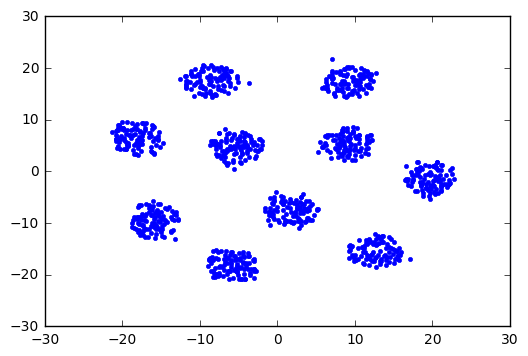

In [58]:
%matplotlib inline
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

model = TSNE(n_components=2, random_state=0)
tsne = model.fit_transform(X_scaled) 
#print tsne
plt.plot(tsne[:,0], tsne[:,1], '.')

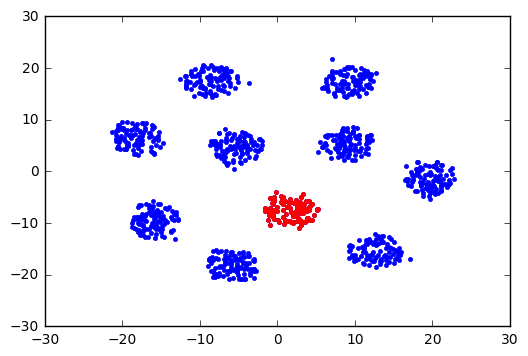

In [59]:
import numpy as np
from sklearn.neighbors import BallTree

tree = BallTree(X_scaled, leaf_size=2)

dist, ind = tree.query([X_scaled[0]], k=100) 

plt.plot(tsne[:,0], tsne[:,1], '.')
plt.plot(tsne[ind[0],0], tsne[ind[0],1], '.', color='r')

{"UID":320045,"personality":[0.283502558825,0.801817659327,0.0747544076824,0.666220427229,0.318682897177,0.287552044095,0.696518658114,0.0,0.771249137263,0.0]}
{"UID":244657,"personality":[1.0,0.87228399944,0.339648211155,0.832991648491,0.0743926544074,0.995118259431,0.135075221343,0.984388065489,0.515476749887,0.514188664126]}
{"UID":749280,"personality":[0.695245769944,0.666004526292,0.553758434624,1.0,0.114499752906,0.158497469883,0.0,1.0,0.741805774751,0.941429075347]}
{"UID":119957,"personality":[0.297381263123,0.363388223616,0.712807834938,0.0263075696455,0.859657801927,0.894466993478,0.222474880743,0.251803512377,0.149896058208,0.40285754108]}
{"UID":331294,"personality":[0.211130474861,0.550639870118,0.0,0.681234062184,0.68583461169,0.410513339189,0.599640417038,0.0331864278579,0.539063686477,1.0]}
{"UID":167589,"personality":[0.0,0.0,0.656013476385,0.0761354782621,0.425748550652,0.55798201634,1.0,0.17870876324,0.725014873924,0.0717875879035]}
{"UID":168086,"personality":[0.452

In [67]:
from __future__ import unicode_literals
from os.path import abspath, join, dirname
import random

FILES = {
    'first:male': './helper/name_gen/dist.male.first',
    'first:female': './helper/name_gen/dist.female.first',
    'last': './helper/name_gen/dist.all.last'
}


def get_name(filename):
    selected = random.random() * 90
    with open(filename) as name_file:
        for line in name_file:
            name, _, cummulative, _ = line.split()
            if float(cummulative) > selected:
                return name
    return ""  # Return empty string if file is empty


def get_first_name(gender=None):
    if gender is None:
        gender = random.choice(('male', 'female'))
    if gender not in ('male', 'female'):
        raise ValueError("Only 'male' and 'female' are supported as gender")
    return get_name(FILES['first:%s' % gender]).capitalize()


def get_last_name():
    return get_name(FILES['last']).capitalize()


def get_full_name(gender=None):
    return "{0} {1}".format(get_first_name(gender), get_last_name())

Fava
Debi


{"UID":745789,"Lastname":"Delara","Firstname":"David","personality":[0.283502558825,0.801817659327,0.0747544076824,0.666220427229,0.318682897177,0.287552044095,0.696518658114,0.0,0.771249137263,0.0]}
{"UID":954959,"Lastname":"Whitmore","Firstname":"Tony","personality":[1.0,0.87228399944,0.339648211155,0.832991648491,0.0743926544074,0.995118259431,0.135075221343,0.984388065489,0.515476749887,0.514188664126]}
{"UID":724830,"Lastname":"Phillips","Firstname":"Evelyn","personality":[0.695245769944,0.666004526292,0.553758434624,1.0,0.114499752906,0.158497469883,0.0,1.0,0.741805774751,0.941429075347]}
{"UID":217477,"Lastname":"Cavazos","Firstname":"Esther","personality":[0.297381263123,0.363388223616,0.712807834938,0.0263075696455,0.859657801927,0.894466993478,0.222474880743,0.251803512377,0.149896058208,0.40285754108]}
{"UID":684667,"Lastname":"Morabito","Firstname":"Nancy","personality":[0.211130474861,0.550639870118,0.0,0.681234062184,0.68583461169,0.410513339189,0.599640417038,0.033186427

In [63]:

from collections import Counter
import random
import json
import sklearn
from sklearn.datasets import make_blobs
import loremipsum


def count_user_reviews(n_reviews=0):
    f = open('./data/comments/reviews_Apps_for_Android_5.json')
    # Get a count of review for each customer
    c = Counter()
    for line in f:
        j = json.loads(line)
        c[ j["reviewerID"] ] += 1
    f.close()
    print sum( 1 for key, value in c.items() if value > n_reviews )

def get_active_reviewers(n_reviews=100):
    f = open('./data/comments/reviews_Apps_for_Android_5.json')
    # Get a count of review for each customer
    c = Counter()
    for line in f:
        j = json.loads(line)
        c[ j["reviewerID"] ] += 1
    f.close()
    
    ID_active = [ key for key, value in c.items() if value > n_reviews ]
    
    f = open('./data/comments/reviews_Apps_for_Android_5.json')
    w = open('./data/comments/short_reviews_App.json', 'w')
    d = {}
    for i, line in enumerate(f):
        if i % 10000 == 0:
            print i,
        j = json.loads(line)
        if j['reviewerID'] in ID_active:
            w.write(line)
    f.close()
    w.close()

    
def generate_user_db(source='./data/comments/short_reviews_App.json'):
    f = open(source)
    # Get a count of review for each customer
    c = Counter()
    for line in f:
        j = json.loads(line)
        c[ j["reviewerID"] ] += 1
    f.close()
    
    UID_amazon = c.keys()
    X, y = sklearn.datasets.make_blobs(n_samples=len(UID_amazon), centers=10,
                                   n_features=10, random_state=0)
    X_scaled = sklearn.preprocessing.MinMaxScaler().fit_transform(X)
    
    #UID_amazon = random.sample(range(100000, 999999), len(X_scaled))
    i=0
    for line in X_scaled:
        if i % 10 == 0:
            print i,
        txt = '{"UID":"' + str(UID_amazon[i]) + '"'
        txt += ',"Lastname":"' + str(get_last_name()) + '"'
        txt += ',"Firstname":"' + str(get_first_name()) + '"'
        txt += ',"personality":['
        for value in line:
            txt += str(value) + ','
        #txt += str(line) 
        txt = txt[:-1]
        txt += ']}'
        #print txt
        with open('./data/user/U_' + str(UID_amazon[i]) + '.json', 'w') as f:
            f.write(txt)
            #json.dump(txt, f)
        i += 1

        
def generate_product_db(source='./data/comments/short_reviews_App.json'):
    f = open(source)
    # Get a count of review for each customer
    c = Counter()
    for line in f:
        j = json.loads(line)
        c[ j["asin"] ] += 1
    f.close()
    
    UID_amazon = c.keys()
    print len(UID_amazon)
    for i in range(len(UID_amazon)):
        if i % 10 == 0:
            print i,
        txt = '{"UID":"' + str(UID_amazon[i]) + '"'
        txt += ',"Title":"' + str(loremipsum.get_sentences(1)[0][:random.randint(10,45)].replace('.','')) + '"'
        txt += ',"Description":"' + str(loremipsum.generate_paragraph()[2]) + '"'
        txt += ',"Price":' + str(random.randint(1000,9999)/100.) + ''
        txt += '}'
        #print txt
        with open('./data/products/P_' + str(UID_amazon[i]) + '.json', 'w') as f:
            f.write(txt)
            #json.dump(txt, f)
        

def get_most_reviewed_product(source='./data/comments/short_reviews_App.json'):
    f = open(source)
    # Get a count of review for each customer
    c = Counter()
    for line in f:
        j = json.loads(line)
        c[ j["asin"] ] += 1
    f.close()
    print max(c, key=c.get), c[max(c, key=c.get)]

def get_random_user(product="B00FAPF5U0", source='./data/comments/short_reviews_App.json'):
    f = open(source)
    # Get a count of review for each customer
    c = Counter()
    test = {}
    for line in f:
        j = json.loads(line)
        if j["reviewerID"] in test:
            test[ j["reviewerID"] ].append( j["asin"] )
        else:
            test[ j["reviewerID"] ] = [ j["asin"] ]
    f.close()
    
    found = False
    while True:
        joker = random.randint(0,len(test))
        k = 0
        for key, value in test.items():
            if k == joker:
                if not product in value:
                    print key
                    found = True
            k += 1
        if found:
            break

            
def generate_review_list(source='./data/comments/short_reviews_App.json'):
    f = open(source)
    # Get a count of review for each customer
    c = Counter()
    summary = {}
    for line in f:
        j = json.loads(line)
        c[ j["asin"] ] += 1
         
        if j["asin"] in summary:
            summary[ j["asin"] ].append( j["reviewerID"] )
        else:
            summary[ j["asin"] ] = [ j["reviewerID"] ]
    f.close()
    
    txt = '{"data": ['
    for key, value in summary.items():
        txt += '{"PID": "' + str(key) + '"'
        txt += ', "reviewedBy": ['
        for uID in value:
            txt += '"' + str(uID) + '" ,'
        txt = txt[:-2]
        txt += ']}, '
    txt = txt[:-2]
    txt += ']}'
    
    with open('./data/products/P_summary.json', 'w') as f:
        f.write(txt)
    print("done")

            
#count_user_reviews(60)   
#get_active_reviewers(60)
#generate_user_db()
#generate_product_db()
#get_most_reviewed_product()  # B00FAPF5U0
get_random_user()  # A2ZUHZZF6QXDYY, A3OQZPJN7BMYSG
#generate_review_list()

A2CPGHEZKCJMP8


In [89]:
def show_rank(source='./data/comments/short_reviews_App.json', pID='B00IYOACQ6', uID='A3OQZPJN7BMYSG'):
    # give ranked list of user IDs
    f = open(source)
    summary = {}
    for line in f:
        j = json.loads(line)
        if j["asin"] in summary:
            summary[ j["asin"] ].append( j["reviewerID"] )
        else:
            summary[ j["asin"] ] = [ j["reviewerID"] ]
    f.close()
    
    relevant_uIDs = summary[pID]
    relevant_uIDs.append(uID)
    #print relevant_uIDs
    X = np.empty((0,10), float)
    personalities = {}
    # get personalities from json files    
    for user in relevant_uIDs:
        f = open(join(dirname('./data/user/'), 'U_' + str(user) + '.json'))
        for line in f:
            j = json.loads(line)
            X = np.append(X, np.array([j["personality"]]), axis=0)
        personalities[str(user)] = np.array([j["personality"]])
    #print X
    tree = BallTree(X, leaf_size=2)
    dist, ind = tree.query(personalities[uID], k=len(X)) 
    print('Ranked reviewers for %s: %s' % (str(uID), str(ind)) )                    
        
# A2ZUHZZF6QXDYY, A3OQZPJN7BMYSG     
show_rank(uID='A2ZUHZZF6QXDYY') 
show_rank(uID='A3OQZPJN7BMYSG')                            

Ranked reviewers for A2ZUHZZF6QXDYY: [[5 0 4 2 1 3]]
Ranked reviewers for A3OQZPJN7BMYSG: [[5 2 3 1 0 4]]
